Mean Squared Error: 2188728173.767268
R-squared: 0.8228652058318228


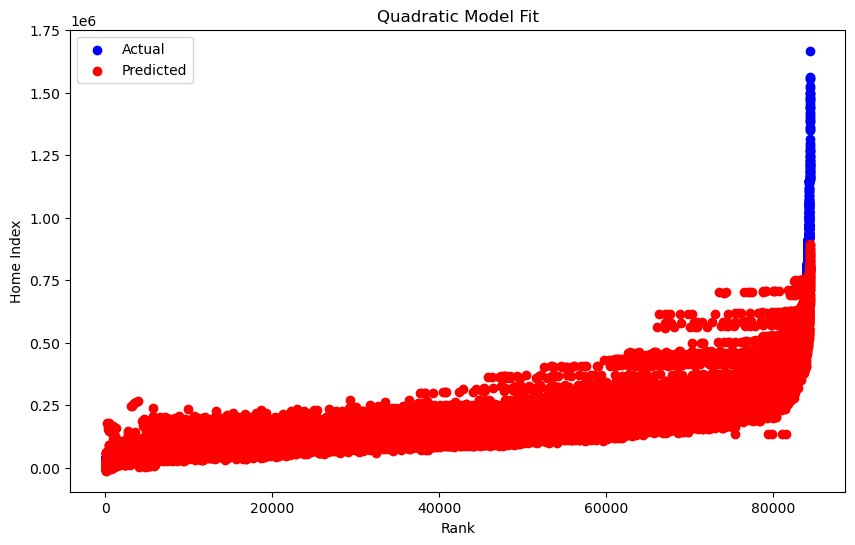

In [20]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 2. Load and prepare data
hi_data_newest = pd.read_csv('hi_data_newest.csv')

# Define features and target
features = ['GDP', 'Unemp_Rate', 'SizeRank', '30_Yr_Mort_Rate', 'Year_Quarter', 'RegionName_Target_Encoded', 'StateName_Target_Encoded']
target = 'Home_Index'

# 3. Generate polynomial features
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(hi_data_newest[features])

# 4. Fit the model
model = LinearRegression()
model.fit(X_poly, hi_data_newest[target])

# Predict and evaluate the model
y_pred = model.predict(X_poly)
mse = mean_squared_error(hi_data_newest[target], y_pred)
r2 = r2_score(hi_data_newest[target], y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(hi_data_newest['Rank'], hi_data_newest[target], color='blue', label='Actual')
plt.scatter(hi_data_newest['Rank'], y_pred, color='red', label='Predicted')
plt.xlabel('Rank')
plt.ylabel('Home Index')
plt.title('Quadratic Model Fit')
plt.legend()
plt.show()


In [21]:
# Sort data by Year_Quarter
hi_data_newest = hi_data_newest.sort_values(by='Year_Quarter').reset_index(drop=True)

# Define split points
n = len(hi_data_newest)
train_end = int(0.6 * n)
val_end = int(0.8 * n)

# Split data into training, validation, and test sets based on sorted Year_Quarter
train_data = hi_data_newest.iloc[:train_end]
val_data = hi_data_newest.iloc[train_end:val_end]
test_data = hi_data_newest.iloc[val_end:]

# Save the split data to CSV files
train_data.to_csv('hi_train_data.csv', index=False)
val_data.to_csv('hi_val_data.csv', index=False)
test_data.to_csv('hi_test_data.csv', index=False)

# Display the sizes of the splits
print(f'Training data size: {train_data.shape}')
print(f'Validation data size: {val_data.shape}')
print(f'Test data size: {test_data.shape}')

Training data size: (50664, 10)
Validation data size: (16888, 10)
Test data size: (16888, 10)


In [ ]:
# Load the split datasets
train_data = pd.read_csv('hi_train_data.csv')
val_data = pd.read_csv('hi_val_data.csv')

# Features and target
features = ['GDP', 'Unemp_Rate', 'SizeRank', '30_Yr_Mort_Rate', 'Year_Quarter', 'RegionName_Target_Encoded', 'StateName_Target_Encoded']
target = 'Home_Index'

# Generate polynomial features
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(train_data[features])
X_val_poly = poly.transform(val_data[features])

# Fit the model
model = LinearRegression()
model.fit(X_train_poly, train_data[target])

# Predict and evaluate the model on training data
y_train_pred = model.predict(X_train_poly)
train_mse = mean_squared_error(train_data[target], y_train_pred)
train_r2 = r2_score(train_data[target], y_train_pred)

# Predict and evaluate the model on validation data
y_val_pred = model.predict(X_val_poly)
val_mse = mean_squared_error(val_data[target], y_val_pred)
val_r2 = r2_score(val_data[target], y_val_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}')
print(f'Validation Mean Squared Error: {val_mse}')
print(f'Validation R-squared: {val_r2}')

# Plot the results for the validation set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(val_data)), val_data[target], color='blue', label='Actual')
plt.scatter(range(len(val_data)), y_val_pred, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Home Index')
plt.title('Quadratic Model Fit on Validation Set')
plt.legend()
plt.show()

In [ ]:
# Load the test dataset
test_data = pd.read_csv('hi_test_data.csv')

# Generate polynomial features for the test set
X_test_poly = poly.transform(test_data[features])

# Predict and evaluate the model on test data
y_test_pred = model.predict(X_test_poly)
test_mse = mean_squared_error(test_data[target], y_test_pred)
test_r2 = r2_score(test_data[target], y_test_pred)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

# Plot the results for the test set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(test_data)), test_data[target], color='blue', label='Actual')
plt.scatter(range(len(test_data)), y_test_pred, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Home Index')
plt.title('Quadratic Model Fit on Test Set')
plt.legend()
plt.show()